In [1]:
import numpy as npy 
import pandas as pds 
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator as ImgDataGen

In [2]:
import os, sys, time, warnings, sklearn
TRAIN_PATH="C:/Users/VIGNESH/OneDrive/Desktop/Btech/sem 6/Deep Learning/FER-2013/train"
TEST_PATH="C:/Users/VIGNESH/OneDrive/Desktop/Btech/sem 6/Deep Learning/FER-2013/test"
train_angry_img_path=TRAIN_PATH +'/angry'

OVERSAMPLED_TRAIN_PATH='fed_oversampled_train'
MODEL_PATH='models'
IMAGE_PATH='images'

def model_arch(model_name):
    !mkdir images
    arch=IMAGE_PATH+'/fer-2013_'+model_name+'.png'
    return arch

def checkpoint_path(model_name):
    checkpoint_path = MODEL_PATH+"/fedav_best_model-"+model_name+".ckpt"
    return checkpoint_path
    


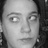

In [3]:
image_data = Image.open("C:/Users/VIGNESH/OneDrive/Desktop/Btech/sem 6/Deep Learning/FER-2013/train/angry/Training_99957517.jpg")
image_data

Image shape: (48, 48)
Image data array: [[ 26  19  22 ... 143 167  62]
 [ 21  26  21 ... 116 111  45]
 [ 27  27  25 ...  74  63  41]
 ...
 [ 40  49  35 ...  26  23  19]
 [ 30  35  39 ...  24  26  19]
 [ 43  60  55 ...  23  26  18]]
Image array shape: (48, 48)


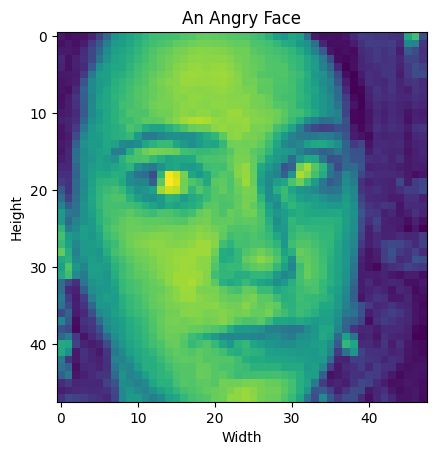

In [4]:
# Get the shape of the image
image=plt.imread(train_angry_img_path+'/Training_99957517.jpg')
print(f'Image shape: {image.shape}')

# Convert image data (like jpeg) to numpy using asarray()
image_array = npy.asarray(image_data)
print(f'Image data array: {image_array}')

# Get the shape of the image array
print(f'Image array shape: {image_array.shape}')

# Printing the image 
plt.imshow(image_array)
plt.xlabel('Width')
plt.ylabel('Height')
plt.title('An Angry Face')
plt.show()

In [5]:
# Get the list of folders in the directory as classes
classes=os.listdir(TRAIN_PATH+'/')
classes

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

In [6]:
def class_sample(type):
    if type.lower() == 'test' or type.lower() == 'train':
        path=''
        if type.lower() == 'train':    
            path= TRAIN_PATH
        else:
            path= TEST_PATH
        
        filepath=path+'/'
        class_count = []
        class_dict ={}
        for folder in os.listdir(filepath) :
              class_count.append(len(os.listdir(filepath+folder)))
              class_dict[folder]=len(os.listdir(filepath+folder))
        class_total = sum(class_count)
        return class_total, class_count, class_dict
    else:
        raise ValueError('Invalid type. Must be "test" or "train".')


def test_train_distribution():
      print("---- Train Set ----")
      avg_train=class_sample('train')[0]/len(class_sample('train')[1])
      print(f'Train class distribution:\n{class_sample("train")[2]}')
      print("Average train class: ",round(avg_train))    
      print('Total train: ', class_sample('train')[0])

      print("\n---- Test Set ----")
      avg_test=class_sample('test')[0]/len(class_sample('test')[1])
      print(f'Test class distribution:\n{class_sample("test")[2]}')
      print("Average test class: ",round(avg_test)) 
      print('Total test: ', class_sample('test')[0])


test_train_distribution()


---- Train Set ----
Train class distribution:
{'angry': 3995, 'disgust': 436, 'fear': 4097, 'happy': 7215, 'neutral': 4965, 'sad': 4830, 'surprise': 3171}
Average train class:  4101
Total train:  28709

---- Test Set ----
Test class distribution:
{'angry': 958, 'disgust': 111, 'fear': 1024, 'happy': 1774, 'neutral': 1233, 'sad': 1247, 'surprise': 831}
Average test class:  1025
Total test:  7178


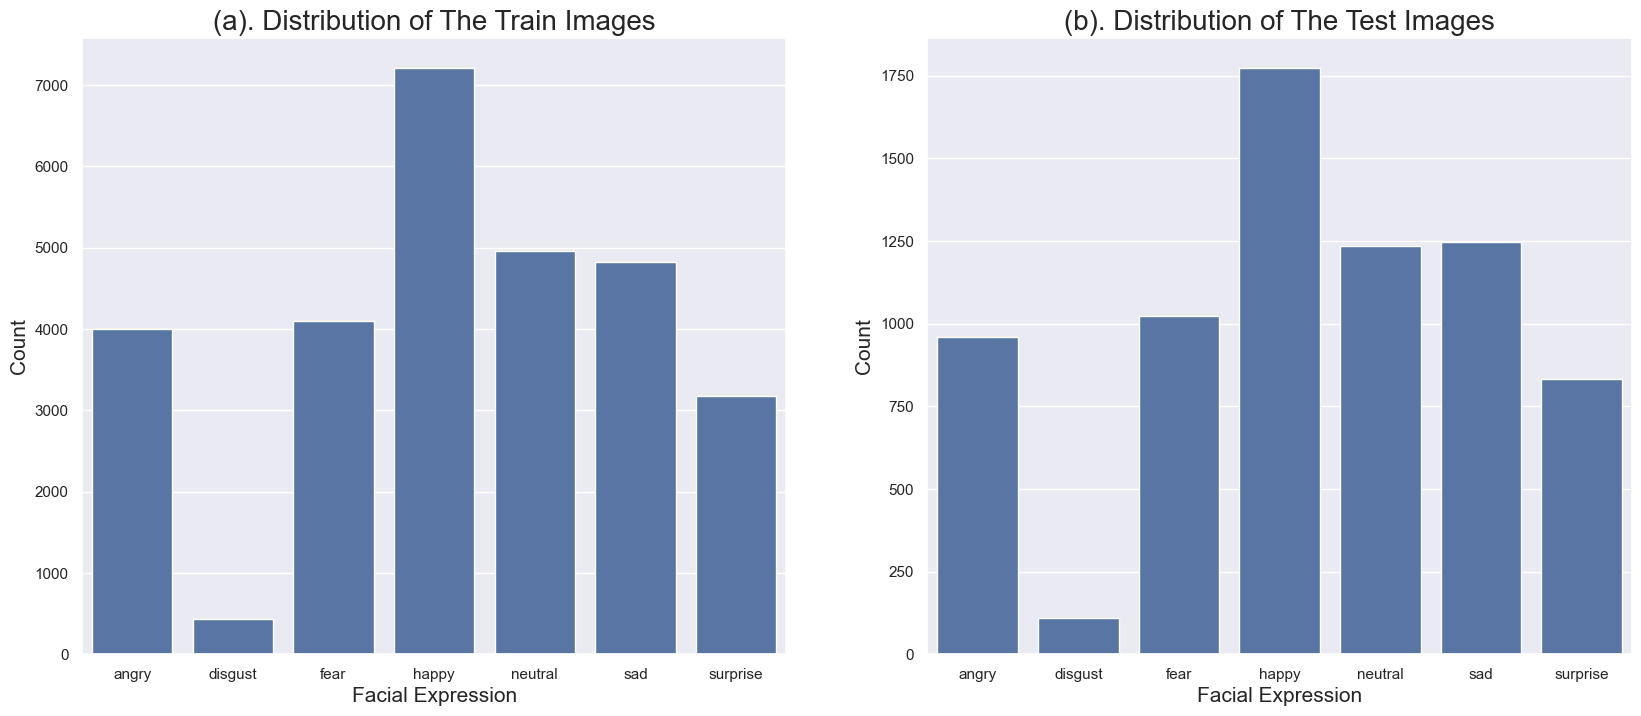

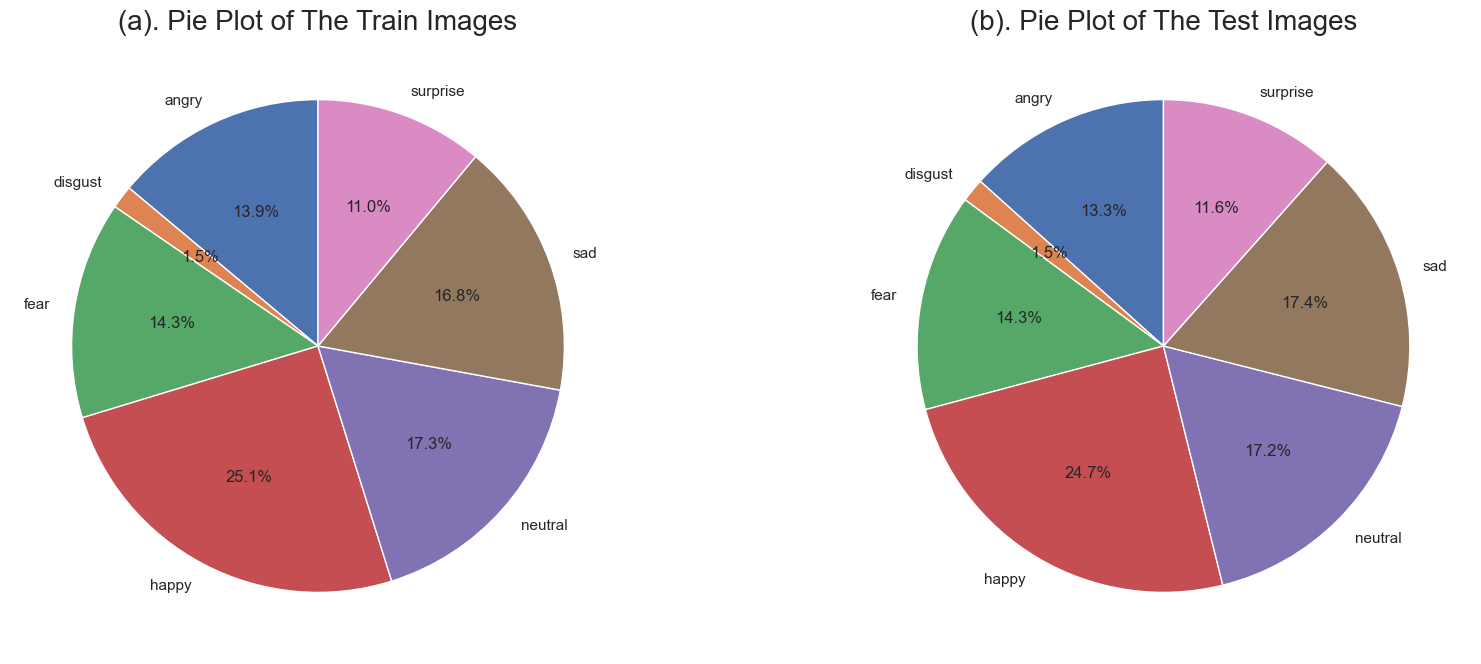

In [7]:
df_train = pds.DataFrame(list(class_sample("train")[2].items()), columns=['Emotion', 'Count'])
df_train.index.name = 'Emotion'
df_test = pds.DataFrame(list(class_sample("test")[2].items()), columns=['Emotion', 'Count'])
df_test.index.name = 'Emotion'


# plot a barplot with vertical orientation
sns.set()
plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
axis = sns.barplot(x='Emotion', y='Count', data=df_train, orient='v')
# set labels and title
plt.xlabel("Facial Expression", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.title("(a). Distribution of The Train Images", fontsize=20)
plt.subplot(1, 2, 2)
sns.barplot(x='Emotion', y='Count', data=df_test, orient='v')
plt.xlabel("Facial Expression", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.title("(b). Distribution of The Test Images", fontsize=20)
plt.show()

print('\n\n')

x_train = npy.array([ len(os.listdir(TRAIN_PATH+'/'+class_name+'/')) for class_name in classes])
x_test = npy.array([ len(os.listdir(TEST_PATH+'/'+class_name+'/')) for class_name in classes])
label = classes
  
# plot a Pie plot with vertical orientation
plt.figure(figsize=(20, 8))
ax = plt.subplot(1, 2, 1)
plt.pie(x_train, labels=label, autopct='%1.1f%%', startangle=90)
ax.set_title('(a). Pie Plot of The Train Images', fontsize=20)

ay = plt.subplot(1, 2, 2)
plt.pie(x_test, labels=label, autopct='%1.1f%%', startangle=90)
ay.set_title('(b). Pie Plot of The Test Images', fontsize=20)
plt.show()

In [8]:
# Oversampling Technique
import os
from PIL import Image

# Define the paths to the original and oversampled dataset
train_dir = TRAIN_PATH
oversampled_dir = OVERSAMPLED_TRAIN_PATH

target_length = 7215 # highest count in a class

if not os.path.exists(oversampled_dir):
    os.mkdir(oversampled_dir)

for subfolder in os.listdir(train_dir):
    subfolder_path = os.path.join(train_dir, subfolder)
    if os.path.isdir(subfolder_path):
        num_images = len(os.listdir(subfolder_path))
        num_duplicates = target_length // num_images
        remainder = target_length % num_images

        for i in range(num_duplicates):
            for image_file in os.listdir(subfolder_path):
                image_path = os.path.join(subfolder_path, image_file)
                image = Image.open(image_path)
                new_image_file = f"{i}_{image_file}"
                new_image_path = os.path.join(oversampled_dir, subfolder, new_image_file)
                if not os.path.exists(os.path.join(oversampled_dir, subfolder)):
                    os.mkdir(os.path.join(oversampled_dir, subfolder))
                image.save(new_image_path)

        if remainder != 0:
            for image_file in os.listdir(subfolder_path)[:remainder]:
                image_path = os.path.join(subfolder_path, image_file)
                image = Image.open(image_path)
                new_image_file = f"{num_duplicates}_{image_file}"
                new_image_path = os.path.join(oversampled_dir, subfolder, new_image_file)
                if not os.path.exists(os.path.join(oversampled_dir, subfolder)):
                    os.mkdir(os.path.join(oversampled_dir, subfolder))
                image.save(new_image_path)


In [9]:
# Get dictionary list of image count per class
def over_class_sample():
        filepath=OVERSAMPLED_TRAIN_PATH+'/'
        class_count = []
        class_dict ={}
        for folder in os.listdir(filepath) :
              class_count.append(len(os.listdir(filepath+folder)))
              class_dict[folder]=len(os.listdir(filepath+folder))
        class_total = sum(class_count)
        return class_total, class_count, class_dict


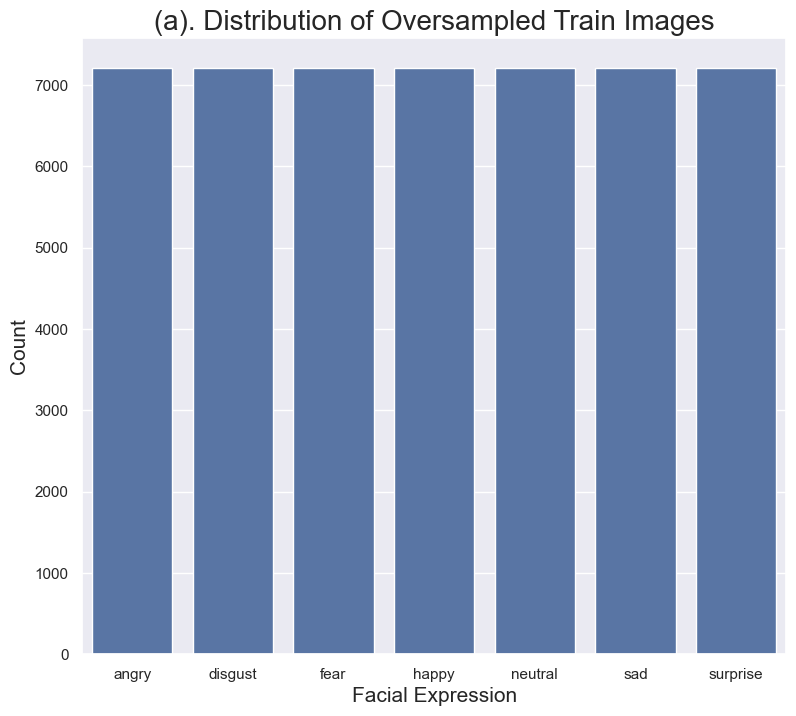


---- Oversampled Train Set ----
Train class distribution:
{'angry': 7215, 'disgust': 7215, 'fear': 7215, 'happy': 7215, 'neutral': 7215, 'sad': 7215, 'surprise': 7215}
Average train class:  7215
Total train:  50505


In [10]:
df_overtrain = pds.DataFrame(list(over_class_sample()[2].items()), columns=['Emotion', 'Count'])
df_overtrain.index.name = 'Emotion'

# plot a barplot with vertical orientation
sns.set()
plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
axis = sns.barplot(x='Emotion', y='Count', data=df_overtrain, orient='v')
# set labels and title
plt.xlabel("Facial Expression", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.title("(a). Distribution of Oversampled Train Images", fontsize=20)
plt.show()



def test_train_distribution():
      print("\n---- Oversampled Train Set ----")
      avg_train=over_class_sample()[0]/len(over_class_sample()[1])
      print(f'Train class distribution:\n{over_class_sample()[2]}')
      print("Average train class: ",round(avg_train))    
      print('Total train: ', over_class_sample()[0])



test_train_distribution()




In [11]:
target_size=(48, 48)
batch_size=32
trainValidation_data_generator = ImgDataGen(
                                            
                                            rotation_range=10,  
                                            zoom_range=0.2,  
                                            width_shift_range=0.1,  
                                            height_shift_range=0.1, 
                                            shear_range=0.2,  
                                            horizontal_flip=True,  
                                            fill_mode='nearest',  
                                            validation_split=0.2                                 
                                            )


# Test Image Data Generator 
test_data_generator = ImgDataGen(
                                
                                )

In [12]:

classes = ['angry','disgust', 'fear', 'happy','neutral', 'sad', 'surprise']

# Mapping images to their classes.
print('Train Set Generated - ',end=' ') 
train_generator = trainValidation_data_generator.flow_from_directory(
                                                            directory=OVERSAMPLED_TRAIN_PATH,  
                                                            target_size=target_size,
                                                            batch_size=batch_size,
                                                            class_mode='categorical', 
                                                            color_mode='rgb', 
                                                            classes=classes,
                                                            shuffle=True, 
                                                            subset='training'
                                                        )
#Mapping images to their classes.
print('Validation Set Generated - ',end=' ') 
validation_generator = trainValidation_data_generator.flow_from_directory( 
                                                            directory=OVERSAMPLED_TRAIN_PATH, 
                                                            target_size=target_size,
                                                            batch_size=batch_size,
                                                            class_mode='categorical', 
                                                            color_mode='rgb', 
                                                            classes= classes,
                                                            shuffle=False, 
                                                            subset='validation'
                                                        )
test_samples=class_sample('test')[0]
test_batch_size=batch_size
test_steps=int(test_samples/test_batch_size)

## Mapping images to their classes.
print('Test Set Generated - ',end=' ') 
test_generator = test_data_generator.flow_from_directory(
                                        directory=TEST_PATH, 
                                        target_size=target_size,
                                        class_mode='categorical', 
                                        color_mode='rgb', 
                                        classes=classes,
                                        shuffle=False, 
                                        batch_size=test_batch_size
                                        )

## Mapping shuffled images to their classes.
print('Shuffled Test Set Generated - ',end=' ') 
test_generator_shuffled = test_data_generator.flow_from_directory(
                                        TEST_PATH, 
                                        target_size=target_size,
                                        class_mode='categorical', 
                                        color_mode='rgb', 
                                        classes=classes,
                                        shuffle=True, 
                                        batch_size=test_batch_size
                                        )

Train Set Generated -  Found 40404 images belonging to 7 classes.
Validation Set Generated -  Found 10101 images belonging to 7 classes.
Test Set Generated -  Found 7178 images belonging to 7 classes.
Shuffled Test Set Generated -  Found 7178 images belonging to 7 classes.


In [13]:
class_dictionary = train_generator.class_indices
class_keys = list(train_generator.class_indices.keys())
class_values = list(train_generator.class_indices.values())
class_count = len(class_keys)

print ('test batch size: ' ,test_batch_size, '  test steps: ', test_steps, ' number of classes : ', class_count)

train_images, train_labels = next(train_generator)
validation_images, validation_labels = next(validation_generator)
test_images, test_labels = next(test_generator)

print(f'\nThere are 7 classes: {classes}')
print(f'The class dictionary are: {class_dictionary}')
print('Class count: ', class_count)

print('\nX_train shape: ', train_images.shape)
print('y_train shape: ', train_labels.shape)
print('\nX_test shape: ', test_images.shape)
print('y_test shape: ', test_labels.shape)

print('\ntrain_generator sample: ', train_generator.samples)
print('validation_generator sample: ', validation_generator.samples)
print('test_generator sample: ', test_generator.samples)

print('\ntrain_generator sample: ', train_generator.labels)
print('validation_generator sample: ', validation_generator.labels)
print('test_generator sample: ', test_generator.labels)


test batch size:  32   test steps:  224  number of classes :  7

There are 7 classes: ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
The class dictionary are: {'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}
Class count:  7

X_train shape:  (32, 48, 48, 3)
y_train shape:  (32, 7)

X_test shape:  (32, 48, 48, 3)
y_test shape:  (32, 7)

train_generator sample:  40404
validation_generator sample:  10101
test_generator sample:  7178

train_generator sample:  [0 0 0 ... 6 6 6]
validation_generator sample:  [0 0 0 ... 6 6 6]
test_generator sample:  [0 0 0 ... 6 6 6]


In [14]:
class_indices = train_generator.class_indices
class_counts = {class_name: 0 for class_name in class_indices}
num_images = train_generator.samples

batch_size = train_generator.batch_size
num_batches = len(train_generator)

for i in range(num_batches):
    batch = next(train_generator)
    images, labels = batch
    for j in range(len(labels)):
        label = npy.argmax(labels[j])  # convert one-hot encoding to integer label
        class_name = list(class_indices.keys())[list(class_indices.values()).index(label)]
        class_counts[class_name] += 1

print(class_counts)
print(f"Total number of images in train generator: {num_images}")

{'angry': 5771, 'disgust': 5767, 'fear': 5773, 'happy': 5774, 'neutral': 5774, 'sad': 5770, 'surprise': 5775}
Total number of images in train generator: 40404


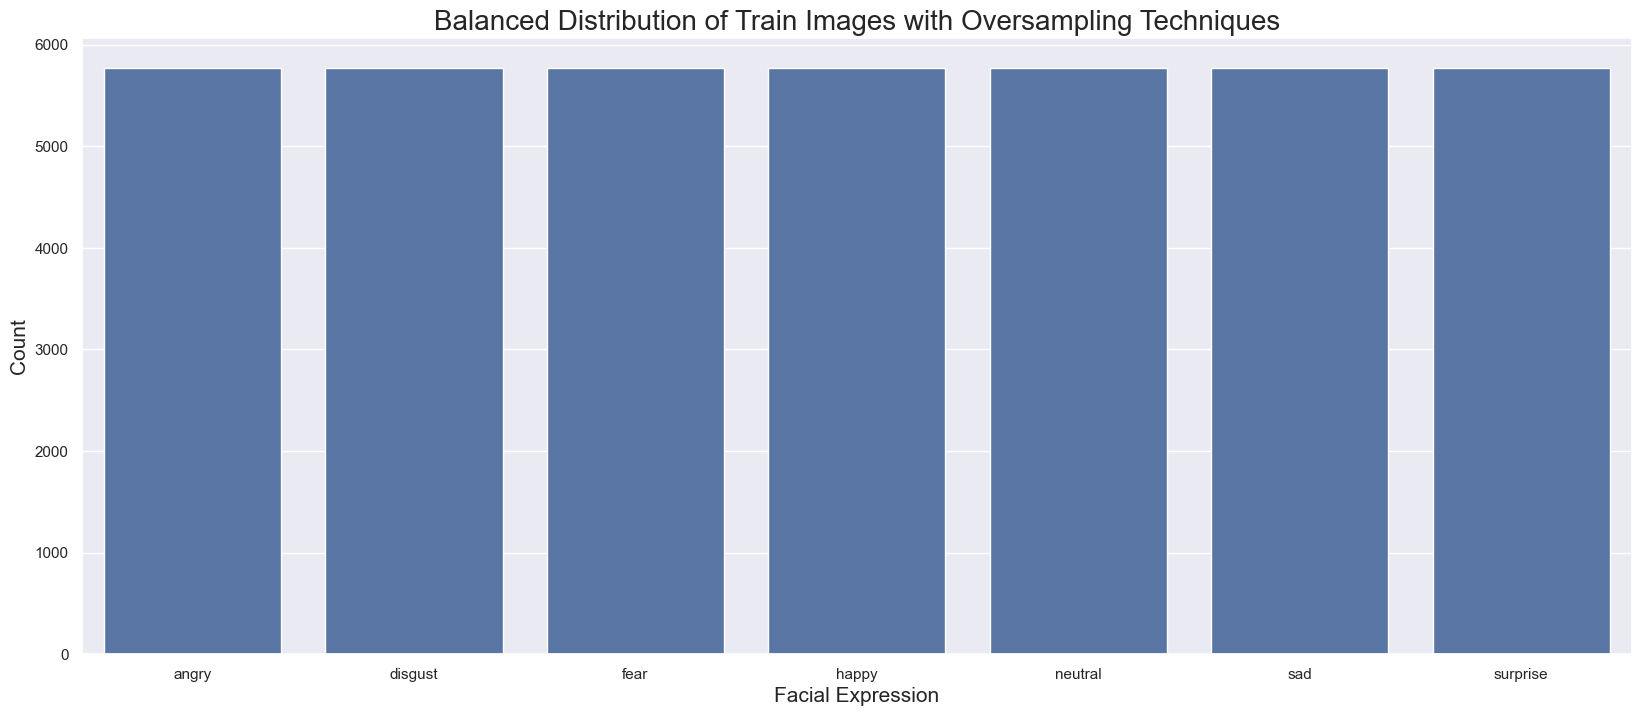

In [15]:
df_train_gen = pds.DataFrame(list(class_counts.items()), columns=['Emotion', 'Count'])
df_train_gen.index.name = 'Emotion'


# plot a barplot with vertical orientation
sns.set()
plt.figure(figsize=(20, 8))
sns.barplot(x='Emotion', y='Count', data=df_train_gen, orient='v')
plt.xlabel("Facial Expression", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.title("Balanced Distribution of Train Images with Oversampling Techniques", fontsize=20)
plt.show()

In [16]:
from tensorflow import keras
from sklearn import set_config
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator as ImgDataGen
from tensorflow.keras.layers import Flatten, Dense, Dropout, Conv2D, MaxPooling2D, Activation, BatchNormalization
from tensorflow.keras.models import Sequential, load_model

from tensorflow.keras import layers, optimizers, metrics, regularizers, models
from tensorflow.keras.optimizers import Adam, Adamax

In [17]:
# define the image shape for the input layer
input_shape=(target_size[0], target_size[1], 3)
batch_size = batch_size
epochs=60
ask_epoch=60


In [23]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import BatchNormalization, Dense, Dropout, MultiHeadAttention, LayerNormalization, GlobalAveragePooling2D, Reshape, Add, Activation
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras import regularizers

# Define the input shape and number of classes
input_shape = (48, 48, 3)  # Based on your actual input shape
class_count = 7  # Based on the number of classes in your dataset

model_name = 'EfficientNetB3'
base_model = tf.keras.applications.efficientnet.EfficientNetB3(
    include_top=False, 
    weights="imagenet",
    input_shape=input_shape, 
    pooling=None  # We won't use pooling here to apply self-attention
)

# Let's make our base_model trainable to get better results
base_model.trainable = True
x = base_model.output

# Adding a Global Average Pooling layer
x = GlobalAveragePooling2D(name='avg_pool')(x)

x = BatchNormalization(
    axis=-1, 
    momentum=0.99, 
    epsilon=0.001,
    name='batch_norm_x'
)(x)
x = Dense(
    2048, 
    activation='relu',
    name='dense_x2048'
)(x)

# Adding Self-Attention after Dense(2048) layer
attention_output = Reshape((1, 2048))(x)  # Reshape for MultiHeadAttention
attention_output = MultiHeadAttention(num_heads=8, key_dim=256)(attention_output, attention_output)
attention_output = Reshape((2048,))(attention_output)  # Reshape back to original shape

# Combining outputs
x = Add()([x, attention_output])
x = Activation("relu")(x)

x = Dense(
    1024, 
    activation='relu',
    name='dense_x1024'
)(x)

# Adding Self-Attention after Dense(1024) layer
attention_output = Reshape((1, 1024))(x)  # Reshape for MultiHeadAttention
attention_output = MultiHeadAttention(num_heads=8, key_dim=128)(attention_output, attention_output)
attention_output = Reshape((1024,))(attention_output)  # Reshape back to original shape

# Combining outputs
x = Add()([x, attention_output])
x = Activation("relu")(x)

x = Dense(
    512, 
    activation='relu',
    name='dense_x512'
)(x)

# Adding Self-Attention after Dense(512) layer
attention_output = Reshape((1, 512))(x)  # Reshape for MultiHeadAttention
attention_output = MultiHeadAttention(num_heads=8, key_dim=64)(attention_output, attention_output)
attention_output = Reshape((512,))(attention_output)  # Reshape back to original shape

# Combining outputs
x = Add()([x, attention_output])
x = Activation("relu")(x)

x = Dense(
    256, 
    kernel_regularizer=regularizers.l2(0.016),
    activity_regularizer=regularizers.l1(0.006),
    bias_regularizer=regularizers.l1(0.006),
    activation='relu',
    name='dense_x'
)(x)

x = Dropout(
    rate=0.5, 
    seed=123,
    name='dropout_x'
)(x) 

output = Dense(
    class_count, 
    activation='softmax',
    name='dense_output'
)(x)

cnn_model = Model(inputs=base_model.input, outputs=output, name=model_name)

learning_rate = 0.001 
cnn_model.compile(
    optimizer=Adamax(learning_rate=learning_rate), 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

cnn_model.summary()


Model: "EfficientNetB3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 48, 48, 3)]          0         []                            
                                                                                                  
 rescaling_4 (Rescaling)     (None, 48, 48, 3)            0         ['input_3[0][0]']             
                                                                                                  
 normalization_2 (Normaliza  (None, 48, 48, 3)            7         ['rescaling_4[0][0]']         
 tion)                                                                                            
                                                                                                  
 rescaling_5 (Rescaling)     (None, 48, 48, 3)            0         ['normalization_2

In [24]:

check_point = tf.keras.callbacks.ModelCheckpoint(
                                          filepath=checkpoint_path(model_name),
                                          save_weights_only=True,
                                          save_best_only=True, 
                                          monitor="val_accuracy",
                                          verbose = 1,
                                        )

reduce_learning = tf.keras.callbacks.ReduceLROnPlateau(
                                            monitor="val_accuracy", 
                                            patience=2,
                                            verbose=1
                                            )

early_stop = tf.keras.callbacks.EarlyStopping(
                                       monitor="val_accuracy", 
                                       min_delta=0.0005,
                                       patience=11, 
                                       verbose=1,
                                       restore_best_weights=True
                                       )

callbacks = [
            check_point,
            reduce_learning, 
            early_stop, 
          ]

In [25]:
model_history=cnn_model.fit(
                  train_generator,  
                  steps_per_epoch=train_generator.n//train_generator.batch_size,
                  epochs=epochs, 
                  verbose=1, 
                  callbacks=callbacks,  
                  validation_data=validation_generator,
                  validation_steps= validation_generator.n//validation_generator.batch_size,
                  )

Epoch 1/60
1262/1262 [==============================] - ETA: 0s - loss: 2.4180 - accuracy: 0.3476
Epoch 1: val_accuracy improved from -inf to 0.47619, saving model to modelsedav_best_model-EfficientNetB3.ckpt
1262/1262 [==============================] - 1429s 1s/step - loss: 2.4180 - accuracy: 0.3476 - val_loss: 1.5727 - val_accuracy: 0.4762 - lr: 0.0010
Epoch 2/60
1262/1262 [==============================] - ETA: 0s - loss: 1.5077 - accuracy: 0.4912
Epoch 2: val_accuracy improved from 0.47619 to 0.55327, saving model to modelsedav_best_model-EfficientNetB3.ckpt
1262/1262 [==============================] - 1475s 1s/step - loss: 1.5077 - accuracy: 0.4912 - val_loss: 1.3063 - val_accuracy: 0.5533 - lr: 0.0010
Epoch 3/60
1262/1262 [==============================] - ETA: 0s - loss: 1.3387 - accuracy: 0.5519
Epoch 3: val_accuracy improved from 0.55327 to 0.58532, saving model to modelsedav_best_model-EfficientNetB3.ckpt
1262/1262 [==============================] - 1346s 1s/step - loss: 1

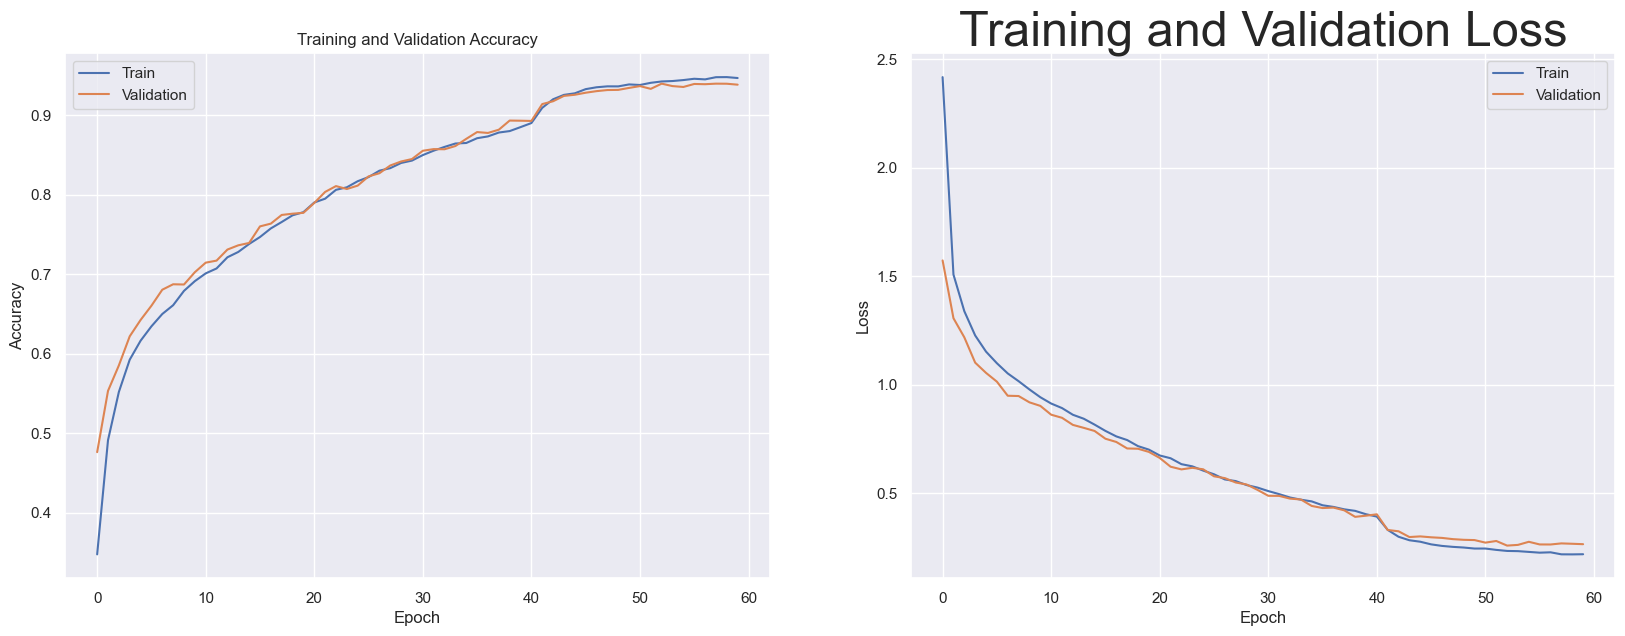

In [26]:
from pylab import rcParams
acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
start_epoch = 0
Epoch_count=len(acc)+ start_epoch
Epochs=[]
for i in range (start_epoch ,Epoch_count):
    Epochs.append(i+1)   
index_loss=npy.argmin(val_loss)
val_lowest=val_loss[index_loss]
index_acc=npy.argmax(val_acc)


# summarize history for accuracy using reLU
sns.set()
plt.figure(figsize=(20, 15))
plt.subplot(2, 2, 1)
plt.plot(acc)
plt.plot(val_acc)
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')



# summarize history for loss using reLU
plt.subplot(2, 2, 2)
plt.plot(loss)
plt.plot(val_loss)
plt.title('Training and Validation Loss', fontsize=35)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


In [28]:
# Loads the weights
cnn_model.load_weights(checkpoint_path(model_name=model_name))

# Re-evaluate the model
loss, acc = cnn_model.evaluate(validation_generator, verbose=2)
print("Restored model, validation accuracy: {:5.2f}%".format(100 * acc))


316/316 - 82s - loss: 0.2575 - accuracy: 0.9663 - 82s/epoch - 260ms/step
Restored model, validation accuracy: 96.63%


316/316 [==============================] - 102s 256ms/step
Total predictions: 10101
603 out of 10101 tested images could not be detected properly.
Accuracy: 96.62%



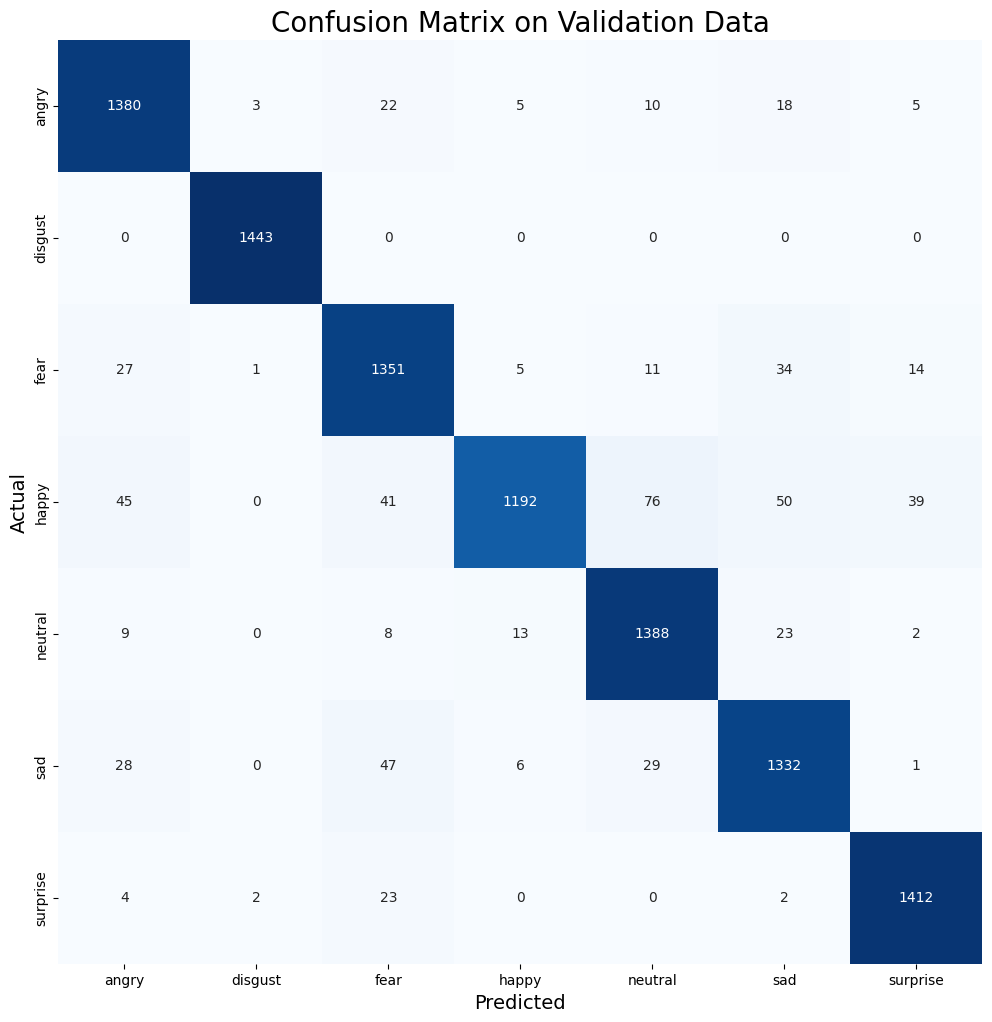

Classification Report on Validation Data:
-------------------------------------
                precision  recall     f1-score   support   
angry           0.97039    0.99662    0.98333    1443      
disgust         0.94120    0.97450    0.95740    1443      
fear            0.95105    0.98279    0.96661    1443      
happy           0.99662    0.84643    0.91553    1443      
neutral         0.96353    0.99662    0.97977    1443      
sad             0.95870    0.96883    0.96374    1443      
surprise        0.99662    0.98432    0.99831    1443      

accuracy                              0.96621   
macro avg       0.96768    0.96621    0.95858    10101     
weighted avg    0.96768    0.96621    0.95858    10101     


In [29]:
def ModelPredictionOnTestDataset(test_generator):
    y_pred= []
    y_label=test_generator.labels
    classes=list(train_generator.class_indices.keys())
    class_count=len(classes)
    wrong_predictions=0
    
    # predict on the test set
    preds=cnn_model.predict(test_generator, test_steps, verbose=1) 
    
    total_predictions=len(preds)
    print(f'total prediction: {total_predictions}')
    for i, p in enumerate(preds):
            pred_index=npy.argmax(p)  
            # labels are integer values       
            true_index=test_generator.labels[i]  
            if pred_index != true_index:       
                # a misclassification has occurred                                     
                wrong_predictions=wrong_predictions + 1
            y_pred.append(pred_index)
    acc=( 1-wrong_predictions/total_predictions) * 100
    print(f'\n{wrong_predictions} out of {total_predictions} tested images could not be detected properly.\nAccuracy of {acc:6.2f}\n')
    ypred=npy.array(y_pred)
    ytrue=npy.array(y_label)
    if class_count <=30:
        cm = confusion_matrix(ytrue, ypred )
        # plot the confusion matrix
        plt.figure(figsize=(12, 8))
        sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)       
        plt.xticks(npy.arange(class_count)+.5, classes, rotation=90)
        plt.yticks(npy.arange(class_count)+.5, classes, rotation=0)
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.title("Confusion Matrix on Validation Data", fontsize=40)
        plt.show()
    clr = classification_report(y_label, y_pred, target_names=classes, digits= 5) # create classification report
    print("Classification Report on Validation Data:\n-------------------------------------\n", clr)       
    return wrong_predictions, total_predictions

wrong_predictions, total_predictions = ModelPredictionOnTestDataset(validation_generator)